# Network Analysis on Disease-Symptom Dataset
773 Unique Diseases and 377 One-Hot Encoded Symptoms with 246,000 samples

# About Dataset
##Description
The dataset contains disease names along with the symptoms faced by the respective patient. There are a total of 773 unique diseases and 377 symptoms, with ~246,000 rows. The dataset was artificially generated, preserving Symptom Severity and Disease Occurrence Possibility.

##Interpretation Info
Several distinct groups of symptoms might all be indicators of the same disease. There may even be one single symptom contributing to a disease in a row or sample. This is an indicator of a very high correlation between the symptom and that particular disease.
A larger number of rows for a particular disease corresponds to its higher probability of occurrence in the real world. Similarly, in a row, if the feature vector has the occurrence of a single symptom, it implies that this symptom has more correlation to classify the disease than any one symptom of a feature vector with multiple symptoms in another sample.

# Load df

In [6]:
%pwd


'e:\\MSC\\SEMESTER3\\network_analysis\\notebooks'

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt3
import seaborn as sns

# Community detection
import community.community_louvain as community_louvain
from networkx.algorithms.community import louvain_communities, greedy_modularity_communities
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms.community import leiden_communities

df = pd.read_csv("../data/Final_Augmented_dataset_Diseases_and_Symptoms.csv")

print(df.shape)
df.head()

(246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

chunk_size = 50000
for i, chunk in enumerate(pd.read_csv('Final_Augmented_dataset_Diseases_and_Symptoms.csv', chunksize=chunk_size), start= 1):
    print(f"Processing chunk with {len(chunk)} rows.")
    chunk.to_csv(f'../data/processed_data{i}.csv', mode='a', header=True, index=False)

Processing chunk with 50000 rows.
Processing chunk with 50000 rows.
Processing chunk with 50000 rows.
Processing chunk with 50000 rows.
Processing chunk with 46945 rows.


### concat and load df

In [ ]:
# import pandas as pd
# import glob

# all_files = glob.glob("processed_data*.csv")

# df_list = []
# for f in sorted(all_files):
#     df_list.append(pd.read_csv(f))

# df = pd.concat(df_list, ignore_index=True)

# print(df.shape)
# display(df.head())

In [8]:
df.shape

(246945, 378)

In [9]:
len(df["diseases"].unique())

773

In [10]:
len(df.columns)

378

# Disease–Symptom Graph

In [11]:
# B = nx.Graph()

# for _, row in df.iterrows():
#     disease = row["diseases"]
#     for symptom, present in row.drop("diseases").items():
#         if present == 1:
#             B.add_edge(disease, symptom)

# print(f"Graph has {B.number_of_nodes()} nodes and {B.number_of_edges()} edges")

In [12]:
edges = []
for _, row in df.iterrows():
    disease = row["diseases"]
    for symptom, val in row.drop("diseases").items():
        if val == 1:  #if symptom present
            edges.append((disease, symptom))

B = nx.Graph()
B.add_edges_from(edges)

disease_nodes = df["diseases"].unique().tolist()
symptom_nodes = list(set(B.nodes()) - set(disease_nodes))

print(f"Total nodes: {B.number_of_nodes()}, edges: {B.number_of_edges()}")

Total nodes: 1097, edges: 5388


# Centrality Analysis

In [13]:
deg = nx.degree_centrality(B)
bet = nx.betweenness_centrality(B)
clo = nx.closeness_centrality(B)

def top_n(metric_dict, node_list, n=10):
    return sorted([(n, v) for n,v in metric_dict.items() if n in node_list],
                  key=lambda x: x[1], reverse=True)[:n]

top_diseases_deg = top_n(deg, disease_nodes)
top_symptoms_deg = top_n(deg, symptom_nodes)

top_diseases_bet = top_n(bet, disease_nodes)
top_symptoms_bet = top_n(bet, symptom_nodes)

top_diseases_clo = top_n(clo, disease_nodes)
top_symptoms_clo = top_n(clo, symptom_nodes)

In [14]:
# for i in top_diseases_deg:
#     if i[0] in df['diseases'].values:
#         print(i[0],True)
top_diseases_deg

[('depression', 0.05291970802919708),
 ('drug abuse', 0.03102189781021898),
 ('lymphedema', 0.01824817518248175),
 ('diaper rash', 0.012773722627737226),
 ('acute pancreatitis', 0.010948905109489052),
 ('infectious gastroenteritis', 0.010948905109489052),
 ('marijuana abuse', 0.010948905109489052),
 ('bursitis', 0.010948905109489052),
 ('spondylosis', 0.010948905109489052),
 ('injury to the arm', 0.010948905109489052)]

In [15]:
# for i in top_symptoms_deg:
#     if i[0] in df.columns.tolist():
#         print(i[0],True)
top_symptoms_deg

[('sharp abdominal pain', 0.12317518248175183),
 ('headache', 0.10583941605839416),
 ('sharp chest pain', 0.0948905109489051),
 ('shortness of breath', 0.09215328467153285),
 ('cough', 0.09124087591240876),
 ('vomiting', 0.08941605839416059),
 ('dizziness', 0.08576642335766423),
 ('nausea', 0.072992700729927),
 ('depressive or psychotic symptoms', 0.06934306569343066),
 ('fever', 0.06934306569343066)]

# Visualization – Top Nodes centrality

In [16]:
def plot_top_nodes(data, title):
    names, scores = zip(*data)
    sns.barplot(x=scores, y=names, palette="viridis")
    plt.title(title)
    plt.xlabel("Score")
    plt.show()

import matplotlib.pyplot as plt
import networkx as nx

# Function to plot full network with highlighted top nodes (others transparent)
def plot_full_network_with_top_nodes(B, top_nodes, centrality_metric, title, top_color="salmon", other_color="lightgray"):
    """
    B: full network
    top_nodes: list of top node names [(node, score), ...]
    centrality_metric: dict of centrality scores for all nodes
    """
    plt.figure(figsize=(8,6))

    # Positions
    pos = nx.spring_layout(B, k=0.15, iterations=30, seed=42)

    # Node sizes and colors
    node_sizes = []
    node_colors = []
    node_alphas = []
    top_node_names = [n for n, _ in top_nodes]

    for n in B.nodes():
        if n in top_node_names:
            node_sizes.append(centrality_metric[n]*5000)  # large for top nodes
            node_colors.append(top_color)
            node_alphas.append(1.0)  # fully opaque
        else:
            node_sizes.append(0)  # small
            node_colors.append(other_color)
            node_alphas.append(0.1)  # transparent

    # Draw edges first
    nx.draw_networkx_edges(B, pos, alpha=0.1, edge_color='gray')

    # Draw nodes with transparency
    for node, size, color, alpha in zip(B.nodes(), node_sizes, node_colors, node_alphas):
        nx.draw_networkx_nodes(B, pos,
                               nodelist=[node],
                               node_size=size,
                               node_color=color,
                               alpha=alpha)

    # Add top node labels
    for n in top_node_names:
        x, y = pos[n]
        plt.text(x, y, n, fontsize=8, fontweight='bold', color=top_color)

    plt.title(title)
    plt.axis('off')
    plt.show()

C:\Users\TECH STORE\AppData\Local\Temp\ipykernel_13820\2987719227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=names, palette="viridis")


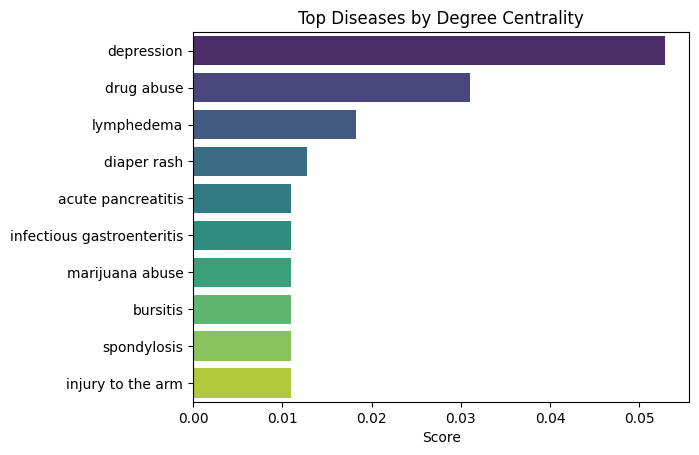

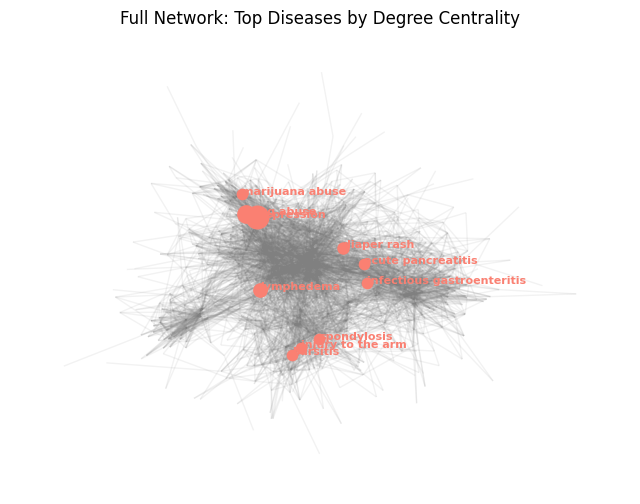

In [18]:
plot_top_nodes(top_diseases_deg, "Top Diseases by Degree Centrality")
plot_full_network_with_top_nodes(B, top_diseases_deg, deg, "Full Network: Top Diseases by Degree Centrality", top_color="salmon")

/tmp/ipython-input-2368781974.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




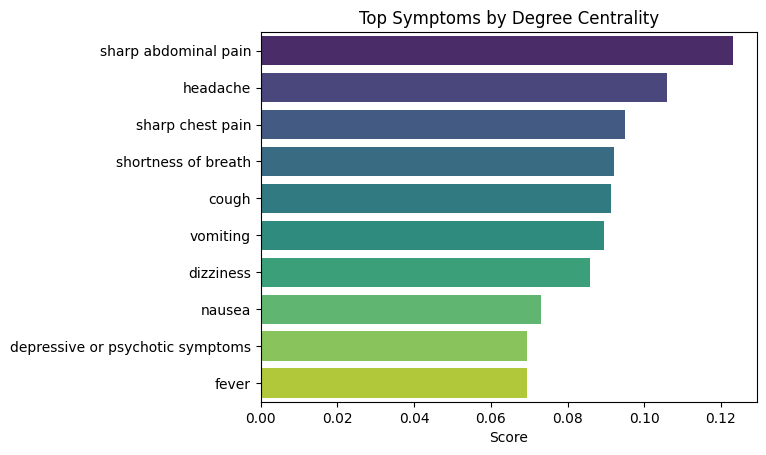

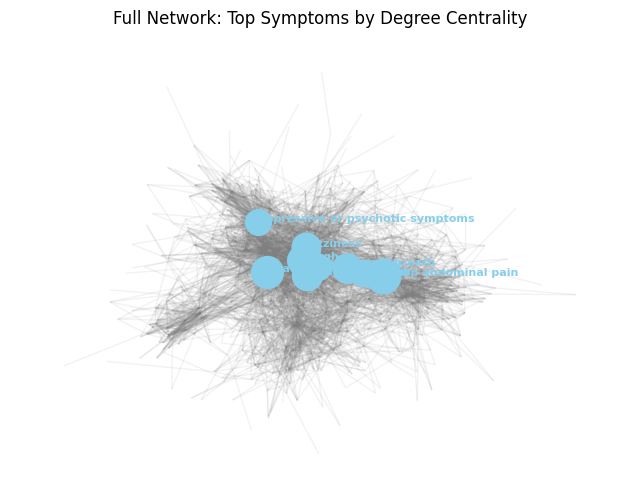

In [ ]:
plot_top_nodes(top_symptoms_deg, "Top Symptoms by Degree Centrality")
plot_full_network_with_top_nodes(B, top_symptoms_deg, deg, "Full Network: Top Symptoms by Degree Centrality", top_color="skyblue")

C:\Users\TECH STORE\AppData\Local\Temp\ipykernel_13820\2987719227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=names, palette="viridis")


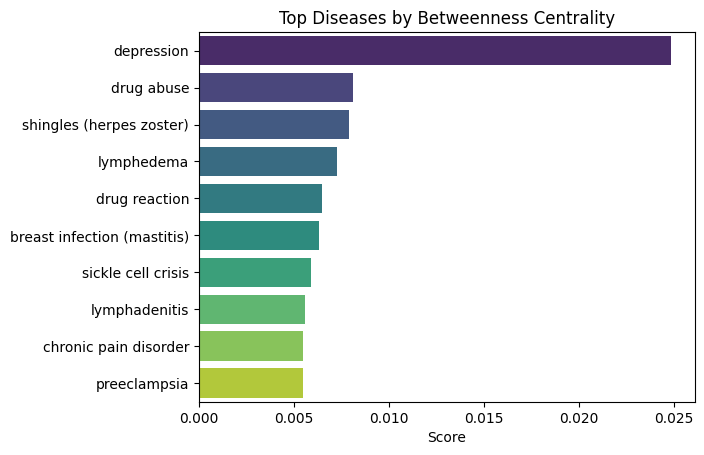

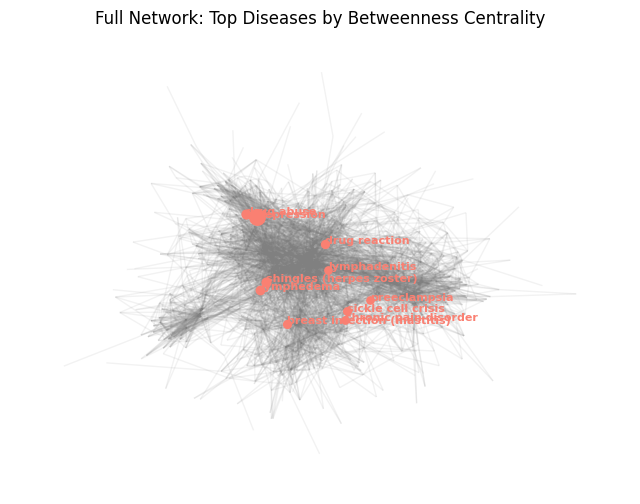

In [19]:
plot_top_nodes(top_diseases_bet, "Top Diseases by Betweenness Centrality")
plot_full_network_with_top_nodes(B, top_diseases_bet, bet, "Full Network: Top Diseases by Betweenness Centrality", top_color="salmon")

C:\Users\TECH STORE\AppData\Local\Temp\ipykernel_13820\2987719227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=names, palette="viridis")


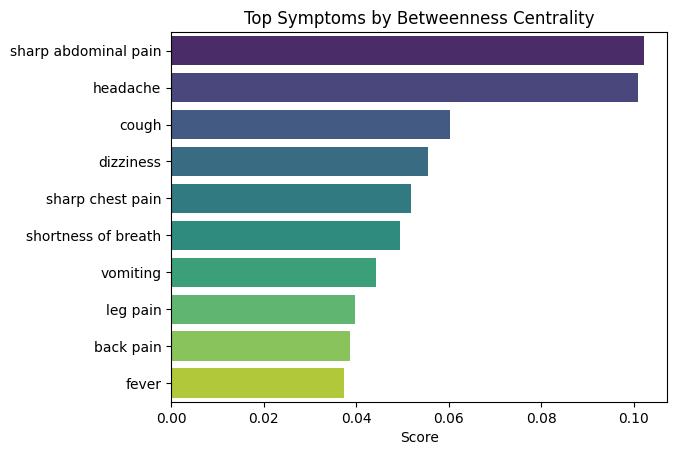

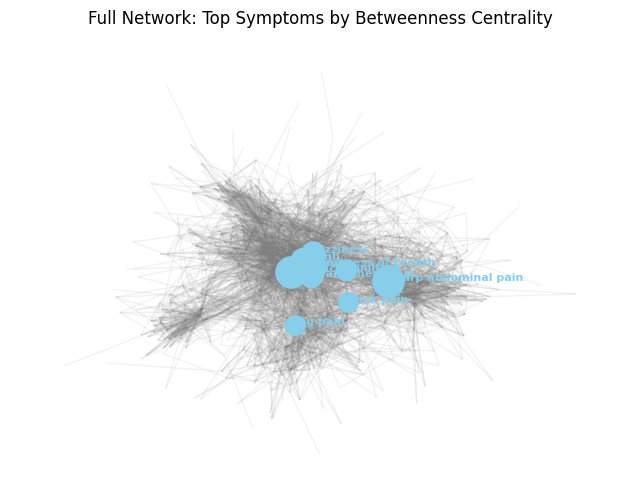

In [20]:
plot_top_nodes(top_symptoms_bet, "Top Symptoms by Betweenness Centrality")
plot_full_network_with_top_nodes(B, top_symptoms_bet, bet, "Full Network: Top Symptoms by Betweenness Centrality", top_color="skyblue")

C:\Users\TECH STORE\AppData\Local\Temp\ipykernel_13820\2987719227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=names, palette="viridis")


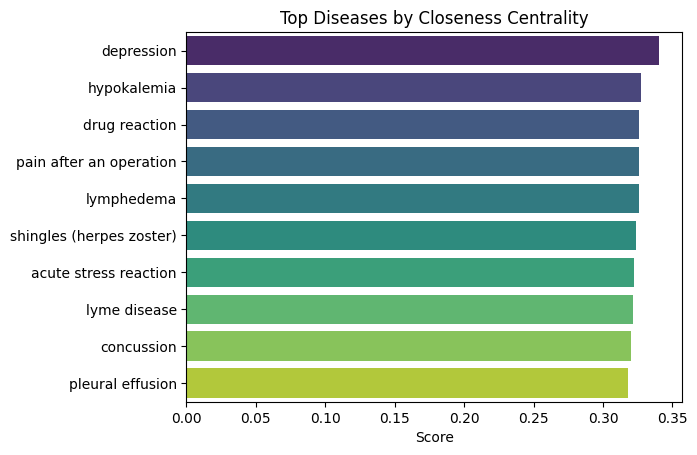

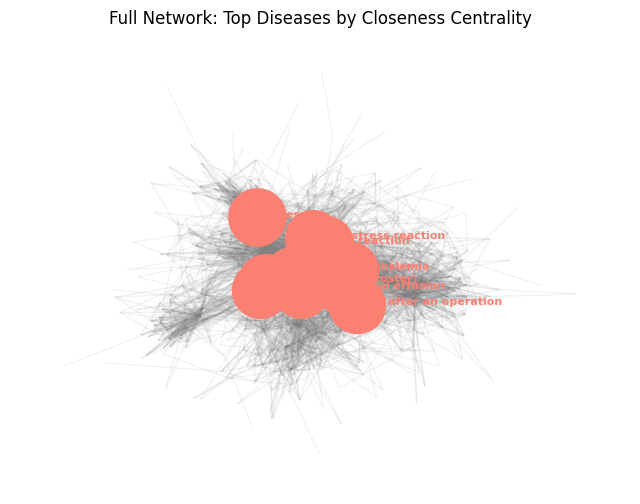

In [21]:
plot_top_nodes(top_diseases_clo, "Top Diseases by Closeness Centrality")
plot_full_network_with_top_nodes(B, top_diseases_clo, clo, "Full Network: Top Diseases by Closeness Centrality", top_color="salmon")

C:\Users\TECH STORE\AppData\Local\Temp\ipykernel_13820\2987719227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=names, palette="viridis")


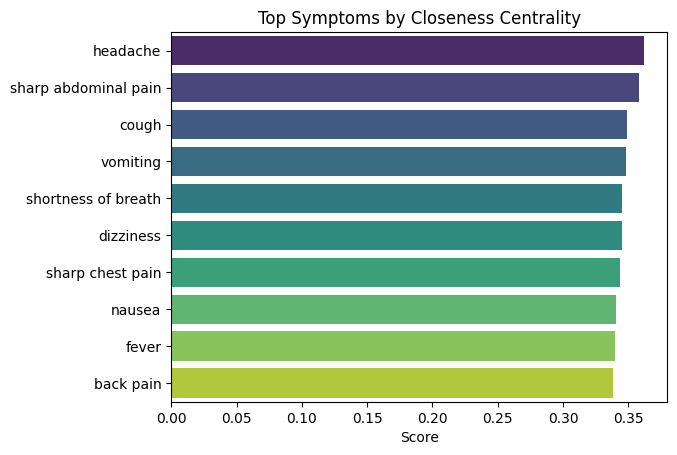

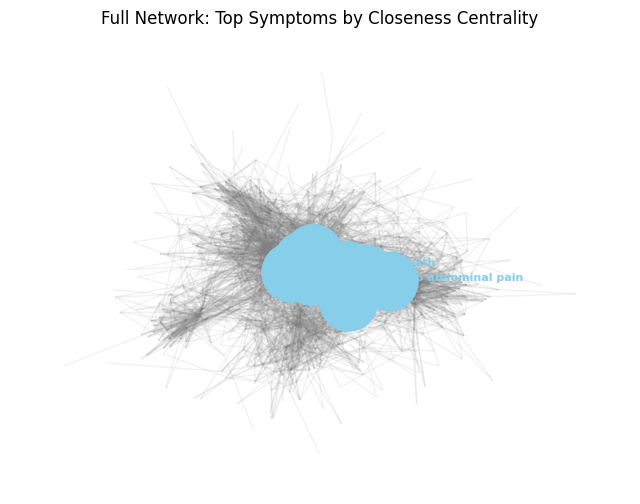

In [22]:
plot_top_nodes(top_symptoms_clo, "Top Symptoms by Closeness Centrality")
plot_full_network_with_top_nodes(B, top_symptoms_clo, clo, "Full Network: Top Symptoms by Closeness Centrality", top_color="skyblue")

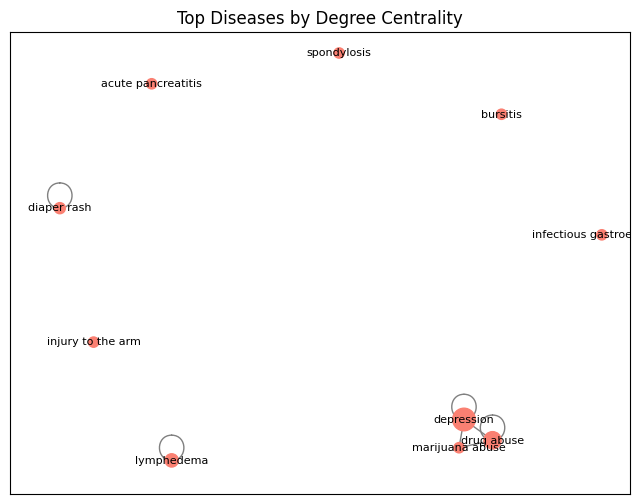

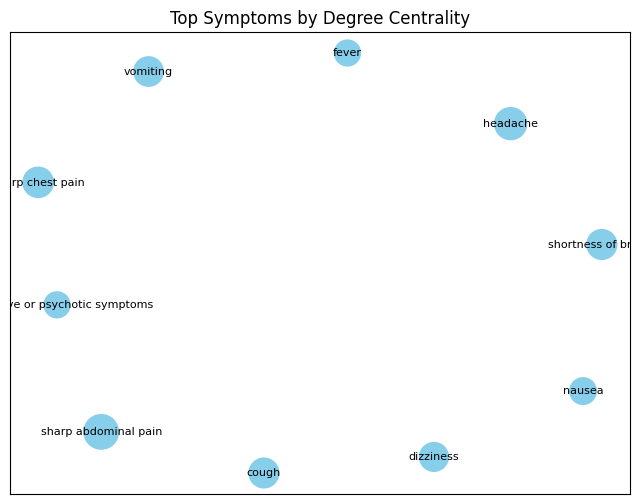

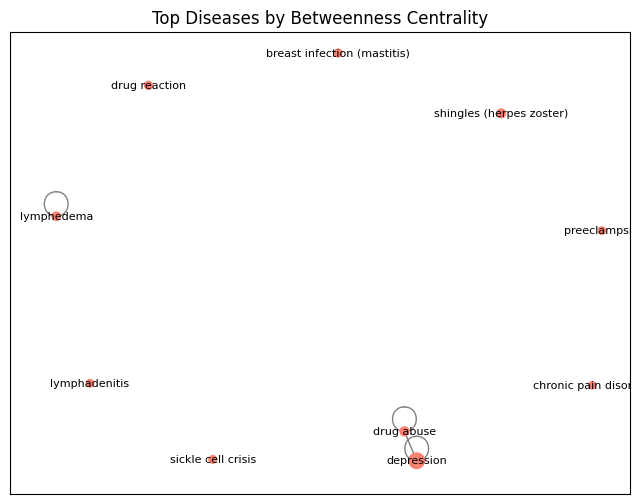

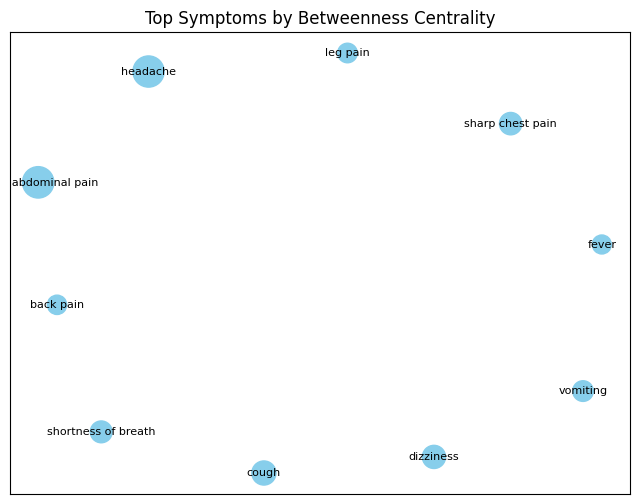

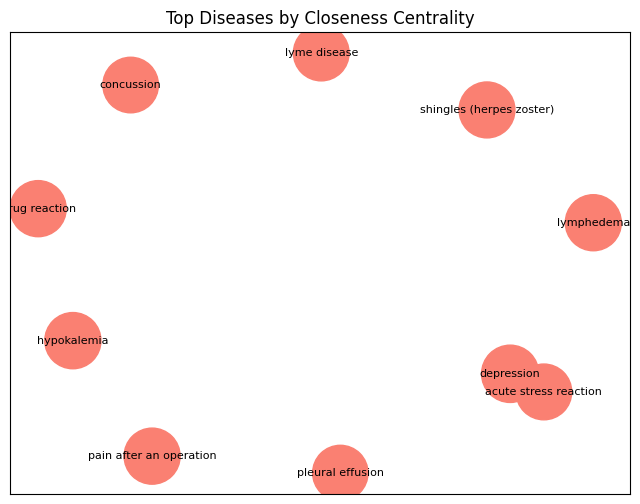

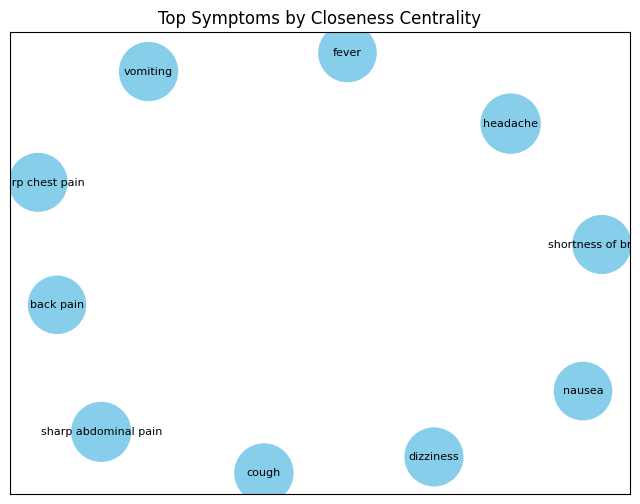

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

top_n_count = 10

G_deg_disease = B.subgraph([n for n, _ in top_diseases_deg])
G_deg_symptom = B.subgraph([n for n, _ in top_symptoms_deg])

G_bet_disease = B.subgraph([n for n, _ in top_diseases_bet])
G_bet_symptom = B.subgraph([n for n, _ in top_symptoms_bet])

G_clo_disease = B.subgraph([n for n, _ in top_diseases_clo])
G_clo_symptom = B.subgraph([n for n, _ in top_symptoms_clo])

pos_deg_disease = nx.spring_layout(G_deg_disease, seed=42)
pos_deg_symptom = nx.spring_layout(G_deg_symptom, seed=42)

pos_bet_disease = nx.spring_layout(G_bet_disease, seed=42)
pos_bet_symptom = nx.spring_layout(G_bet_symptom, seed=42)

pos_clo_disease = nx.spring_layout(G_clo_disease, seed=42)
pos_clo_symptom = nx.spring_layout(G_clo_symptom, seed=42)


def plot_network(G, pos, metric_scores, title, node_color="skyblue"):
    plt.figure(figsize=(8,6))
    nx.draw_networkx(
        G,
        pos,
        node_size=[metric_scores[n]*5000 for n in G.nodes()],
        node_color=node_color,
        edge_color="gray",
        with_labels=True,
        font_size=8
    )
    plt.title(title)
    plt.show()

# Degree Centrality
plot_network(G_deg_disease, pos_deg_disease, deg, "Top Diseases by Degree Centrality", node_color="salmon")
plot_network(G_deg_symptom, pos_deg_symptom, deg, "Top Symptoms by Degree Centrality", node_color="skyblue")

# Betweenness Centrality
plot_network(G_bet_disease, pos_bet_disease, bet, "Top Diseases by Betweenness Centrality", node_color="salmon")
plot_network(G_bet_symptom, pos_bet_symptom, bet, "Top Symptoms by Betweenness Centrality", node_color="skyblue")

# Closeness Centrality
plot_network(G_clo_disease, pos_clo_disease, clo, "Top Diseases by Closeness Centrality", node_color="salmon")
plot_network(G_clo_symptom, pos_clo_symptom, clo, "Top Symptoms by Closeness Centrality", node_color="skyblue")


In [24]:
top_diseases_deg = top_n(deg, disease_nodes)
top_symptoms_deg = top_n(deg, symptom_nodes)

top_diseases_bet = top_n(bet, disease_nodes)
top_symptoms_bet = top_n(bet, symptom_nodes)

top_diseases_clo = top_n(clo, disease_nodes)
top_symptoms_clo = top_n(clo, symptom_nodes)

In [25]:
top_n= 5
print("🔹 Top 5 Degree Centrality:")
for i in top_diseases_deg[:top_n]:
    print('\t',i[0])
print("🔹 Top 5 Betweenness Centrality:")
for i in top_diseases_bet[:top_n]:
    print('\t',i[0])
print("🔹 Top 5 Closeness Centrality:")
for i in top_diseases_clo[:top_n]:
    print('\t',i[0])

🔹 Top 5 Degree Centrality:
	 depression
	 drug abuse
	 lymphedema
	 diaper rash
	 acute pancreatitis
🔹 Top 5 Betweenness Centrality:
	 depression
	 drug abuse
	 shingles (herpes zoster)
	 lymphedema
	 drug reaction
🔹 Top 5 Closeness Centrality:
	 depression
	 hypokalemia
	 drug reaction
	 pain after an operation
	 lymphedema


In [26]:
top_n= 5
print("🔹 Top 5 Degree Centrality:")
for i in top_symptoms_deg[:top_n]:
    print('\t',i[0])
print("🔹 Top 5 Betweenness Centrality:")
for i in top_symptoms_bet[:top_n]:
    print('\t',i[0])
print("🔹 Top 5 Closeness Centrality:")
for i in top_symptoms_clo[:top_n]:
    print('\t',i[0])

🔹 Top 5 Degree Centrality:
	 sharp abdominal pain
	 headache
	 sharp chest pain
	 shortness of breath
	 cough
🔹 Top 5 Betweenness Centrality:
	 sharp abdominal pain
	 headache
	 cough
	 dizziness
	 sharp chest pain
🔹 Top 5 Closeness Centrality:
	 headache
	 sharp abdominal pain
	 cough
	 vomiting
	 shortness of breath


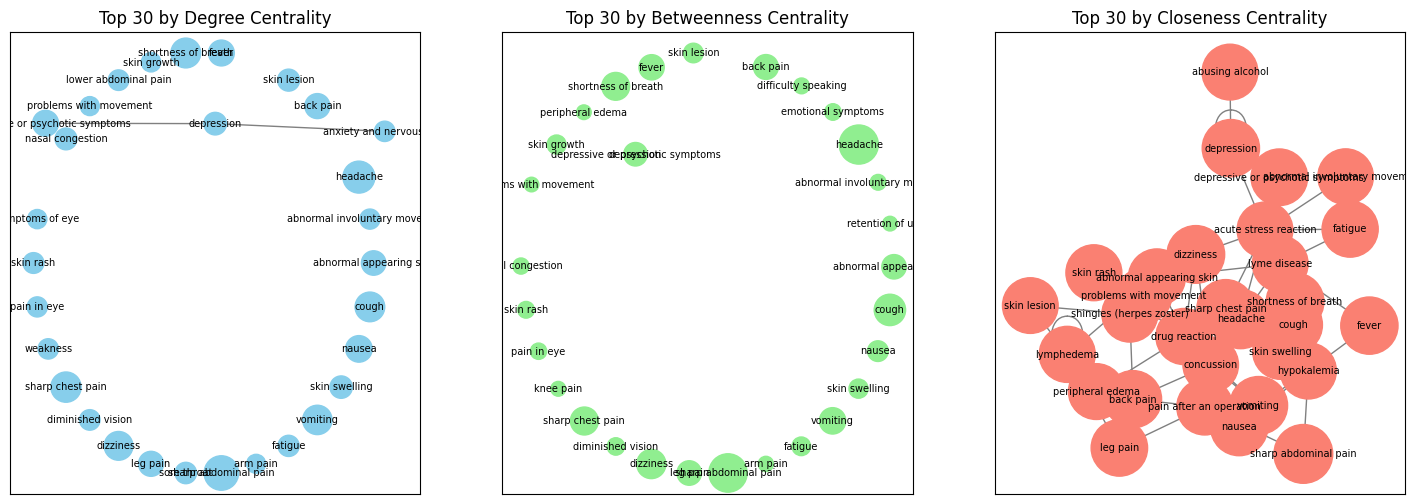

In [27]:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# ---- Centrality Calculations ----
deg_cent = nx.degree_centrality(B)
bet_cent = nx.betweenness_centrality(B, k=500, seed=42)  # approximation for speed
close_cent = nx.closeness_centrality(B)

# ---- Extract Top 30 Nodes by Each Measure ----
top_deg_nodes = sorted(deg_cent, key=deg_cent.get, reverse=True)[:30]
top_bet_nodes = sorted(bet_cent, key=bet_cent.get, reverse=True)[:30]
top_close_nodes = sorted(close_cent, key=close_cent.get, reverse=True)[:30]

# Subgraphs
G_deg = B.subgraph(top_deg_nodes)
G_bet = B.subgraph(top_bet_nodes)
G_close = B.subgraph(top_close_nodes)

# Layouts
pos_deg = nx.kamada_kawai_layout(G_deg)
pos_bet = nx.kamada_kawai_layout(G_bet)
pos_close = nx.kamada_kawai_layout(G_close)

# ---- Visualization ----
plt.figure(figsize=(18,6))

# Degree Centrality
plt.subplot(1,3,1)
nx.draw_networkx(G_deg, pos_deg,
                 with_labels=True,
                 node_size=[deg_cent[n]*5000 for n in G_deg.nodes()],
                 node_color="skyblue", edge_color="gray", font_size=7)
plt.title("Top 30 by Degree Centrality")

# Betweenness Centrality
plt.subplot(1,3,2)
nx.draw_networkx(G_bet, pos_bet,
                 with_labels=True,
                 node_size=[bet_cent[n]*8000 for n in G_bet.nodes()],
                 node_color="lightgreen", edge_color="gray", font_size=7)
plt.title("Top 30 by Betweenness Centrality")

# Closeness Centrality
plt.subplot(1,3,3)
nx.draw_networkx(G_close, pos_close,
                 with_labels=True,
                 node_size=[close_cent[n]*5000 for n in G_close.nodes()],
                 node_color="salmon", edge_color="gray", font_size=7)
plt.title("Top 30 by Closeness Centrality")

plt.show()


# Community Detection

In [ ]:
# !pip install python-igraph leidenalg -q

### using Louvain Method

In [28]:
louvain_partition = community_louvain.best_partition(B)
modularity = community_louvain.modularity(louvain_partition, B)
print("Louvain Modularity:", modularity)

Louvain Modularity: 0.5957535277327217


### using Leiden Algorithm

In [29]:
import igraph as ig
import leidenalg

# Convert NetworkX graph to igraph graph
G_ig = ig.Graph.TupleList(B.edges(), directed=False)

# Run Leiden algorithm
leiden_partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)

print("Leiden detected communities:", len(leiden_partition))

Leiden detected communities: 9


### Visualize Communities

In [ ]:
# plt.figure(figsize=(12,10))
# pos = nx.spring_layout(B, k=0.15, iterations=30)

# # Color by community (Louvain)
# colors = [louvain_part[n] for n in B.nodes()]
# nx.draw(B, pos, node_color=colors, node_size=40, with_labels=False, cmap=plt.cm.tab20)

# plt.title("Disease–Symptom Network (Louvain Communities)")
# plt.show()

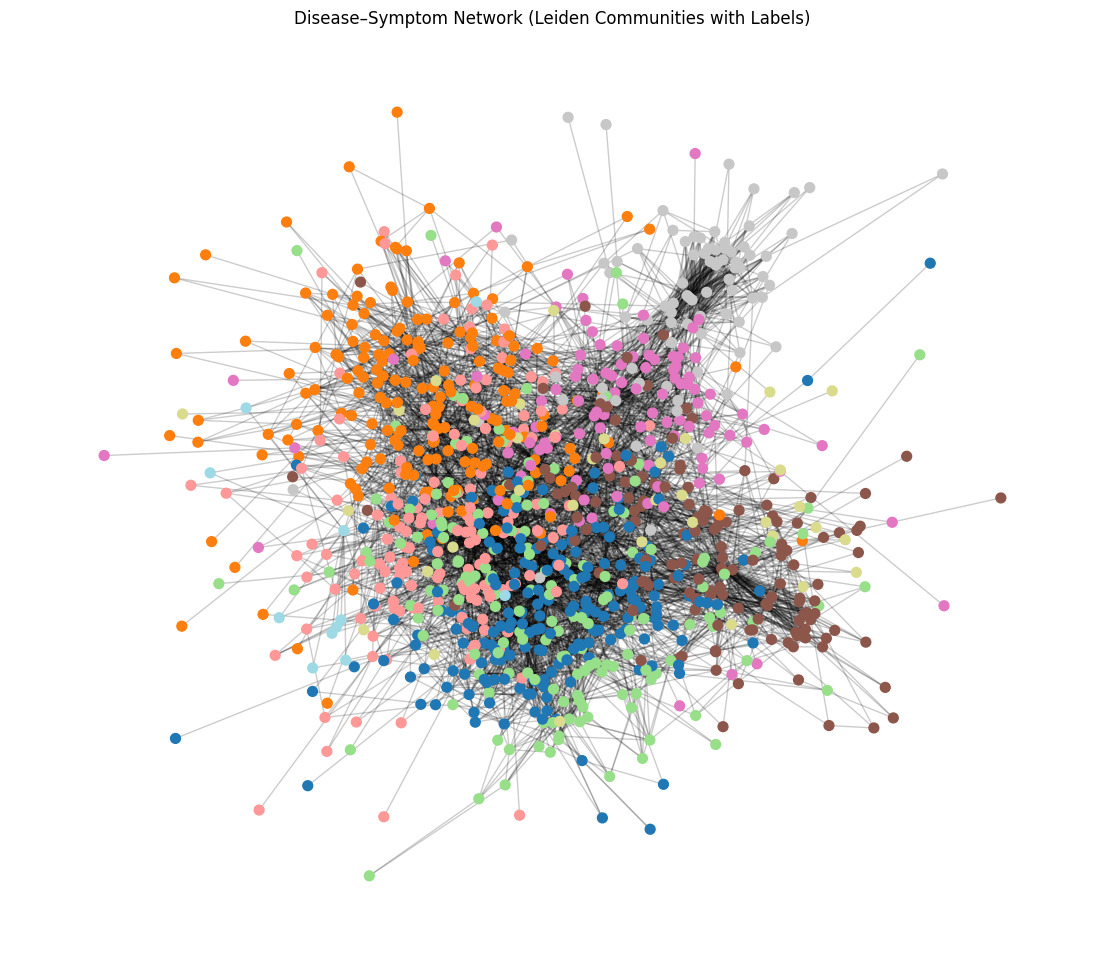

In [30]:
# Visualization with labels as node names
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(B, k=0.15, iterations=30)

# Colors by community
# Create a dictionary mapping nodes to their community ID from the Leiden partition
community_dict = {}
for i, comm in enumerate(leiden_partition):
    for node in comm:
        community_dict[G_ig.vs[node]["name"]] = i

colors = [community_dict[n] for n in B.nodes()]

nx.draw_networkx_nodes(B, pos, node_color=colors, cmap=plt.cm.tab20, node_size=50)
nx.draw_networkx_edges(B, pos, alpha=0.2)

# Add node labels (disease/symptom names)
# nx.draw_networkx_labels(B, pos, font_size=6, font_color="black")

plt.title("Disease–Symptom Network (Leiden Communities with Labels)")
plt.axis("off")
plt.show()

In [35]:
import plotly.graph_objects as go
import numpy as np

# 3D layout for nodes
pos_3d = nx.spring_layout(B, dim=3, seed=42)

# Extract coordinates
x_nodes = [pos_3d[node][0] for node in B.nodes()]
y_nodes = [pos_3d[node][1] for node in B.nodes()]
z_nodes = [pos_3d[node][2] for node in B.nodes()]

# Community colors
colors = [community_dict[n] for n in B.nodes()]

# Build edge coordinates
edge_x, edge_y, edge_z = [], [], []
for edge in B.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

# Create Plotly figure
fig = go.Figure()

# Add edges
fig.add_trace(go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=0.5),
    hoverinfo='none'
))

# Add nodes
fig.add_trace(go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    # text=[str(n) for n in B.nodes()],  # shows disease/symptom name
    textposition="top center",
    marker=dict(
        size=5,
        color=colors,
        colorscale="Viridis",
        opacity=0.8
    )
))

# Layout
fig.update_layout(
    title="Disease–Symptom Network (Leiden Communities, 3D)",
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(xaxis=dict(showbackground=False),
               yaxis=dict(showbackground=False),
               zaxis=dict(showbackground=False))
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [37]:
import plotly.graph_objects as go
import numpy as np

# Get community list
communities = {}
for node, comm in community_dict.items():
    communities.setdefault(comm, []).append(node)

# Layout in 3D
pos_3d = nx.spring_layout(B, dim=3, seed=42)

fig = go.Figure()
# Extract coordinates
x_nodes = [pos_3d[node][0] for node in B.nodes()]
y_nodes = [pos_3d[node][1] for node in B.nodes()]
z_nodes = [pos_3d[node][2] for node in B.nodes()]

# Community colors
colors = [community_dict[n] for n in B.nodes()]

# Add edges once
edge_x, edge_y, edge_z = [], [], []
for edge in B.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

fig.add_trace(go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='lightgray', width=0.5),
    hoverinfo='none',
    name="Edges",
    showlegend=False
))

# Add one trace per community
traces = []
for comm_id, nodes in communities.items():
    x_nodes = [pos_3d[n][0] for n in nodes]
    y_nodes = [pos_3d[n][1] for n in nodes]
    z_nodes = [pos_3d[n][2] for n in nodes]

    trace = go.Scatter3d(
        x=x_nodes, y=y_nodes, z=z_nodes,
        mode='markers',
        marker=dict(size=5, opacity=0.8),
        name=f"Community {comm_id}",
        text=[str(n) for n in nodes],
        hoverinfo="text"
    )
    fig.add_trace(trace)
    traces.append(trace)

# Add checkboxes to toggle communities
fig.update_layout(
    title="Disease–Symptom Network (Leiden Communities, 3D)",
    margin=dict(l=0, r=0, b=0, t=30),
    updatemenus=[{
        "buttons": [
            {"label": "All", "method": "update",
             "args": [{"visible": [True] + [True]*len(communities)}]},
            {"label": "None", "method": "update",
             "args": [{"visible": [True] + [False]*len(communities)}]}
        ],
        "direction": "down",
        "showactive": True,
        "x": 1.1, "y": 1.15
    }],
    scene=dict(xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False))
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Louvain Modularity: 0.592875627821511
Leiden detected communities: 9


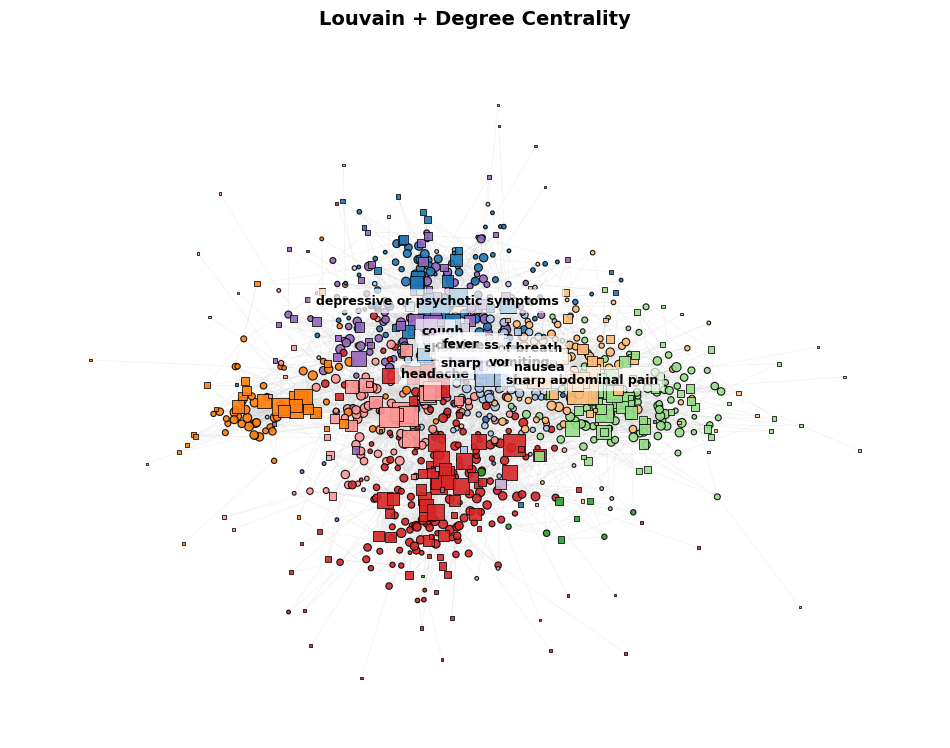

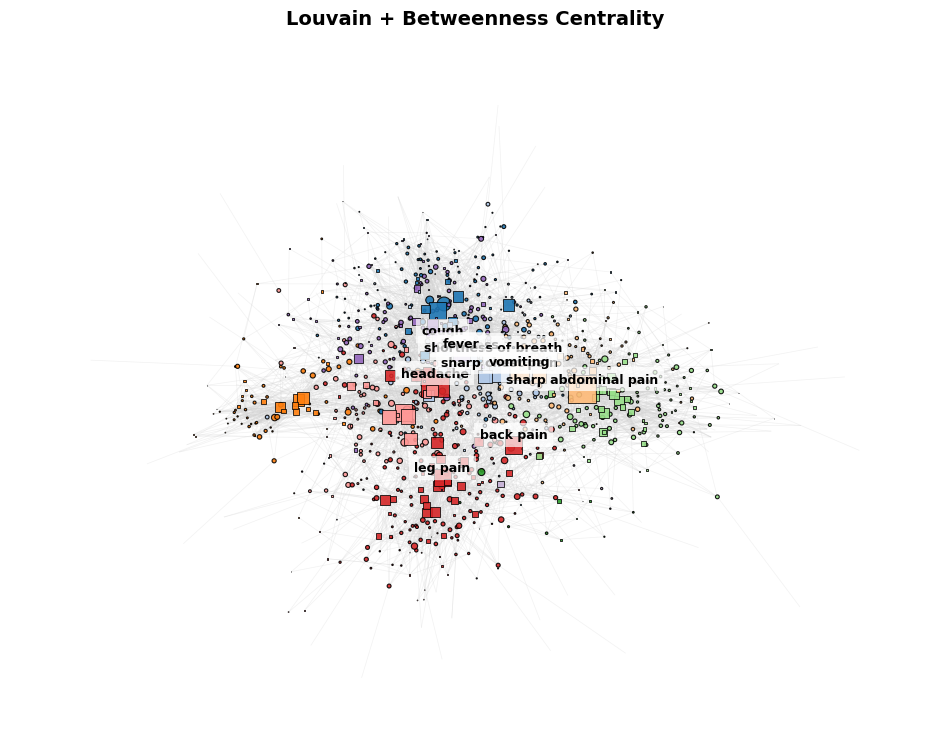

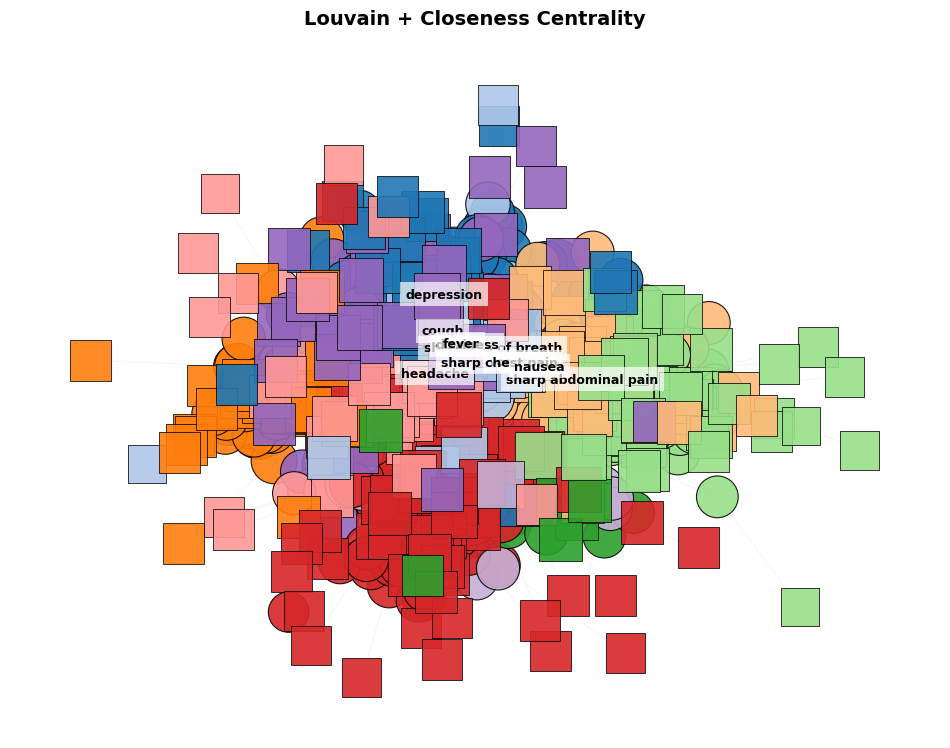

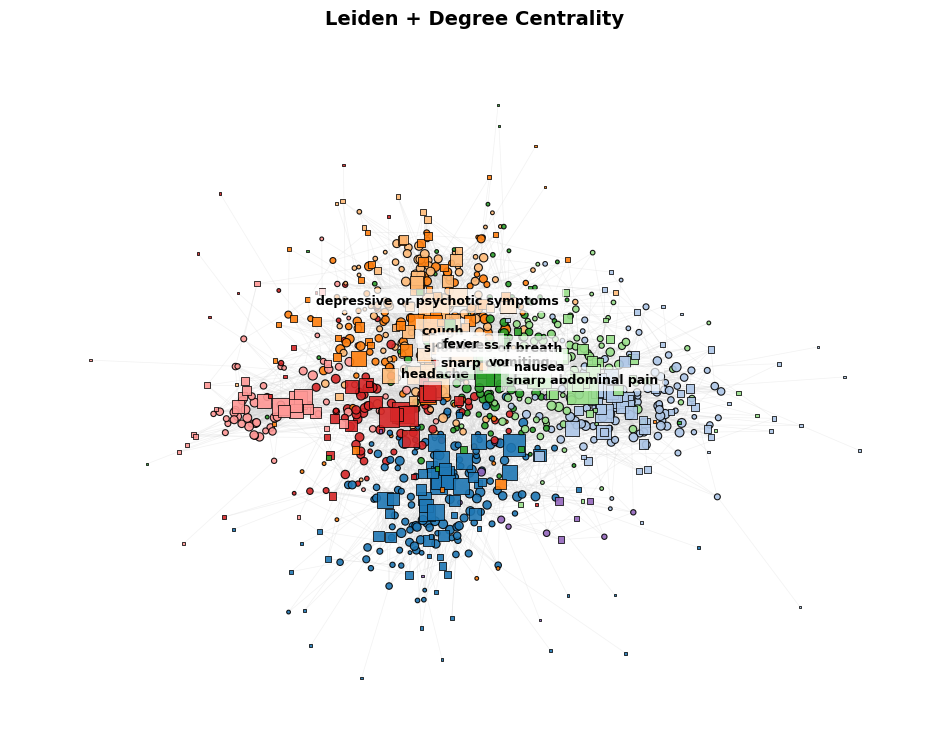

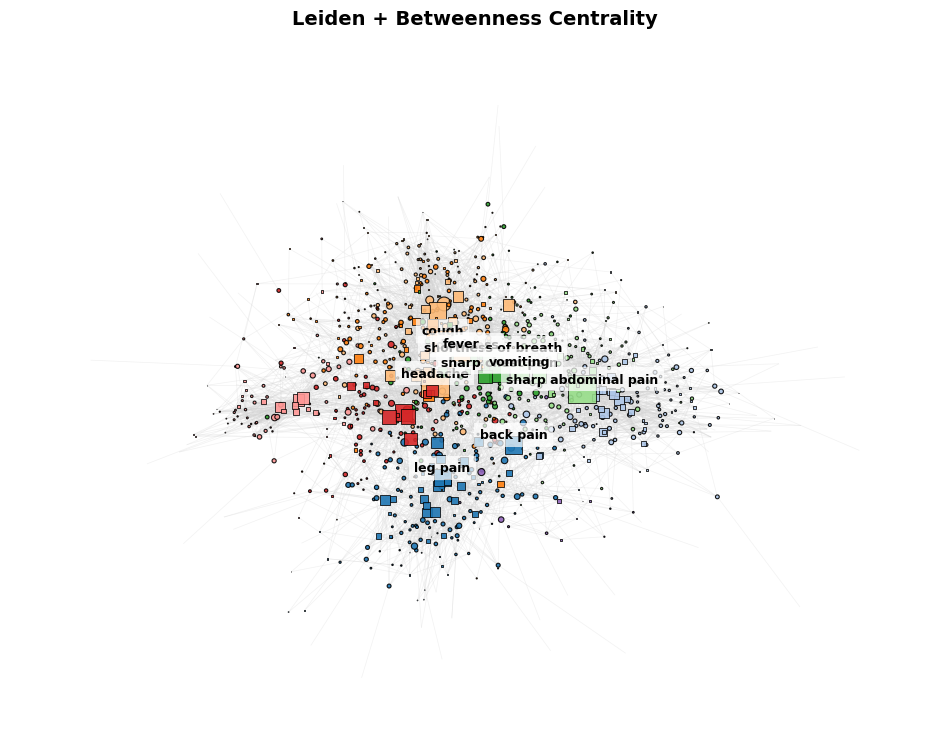

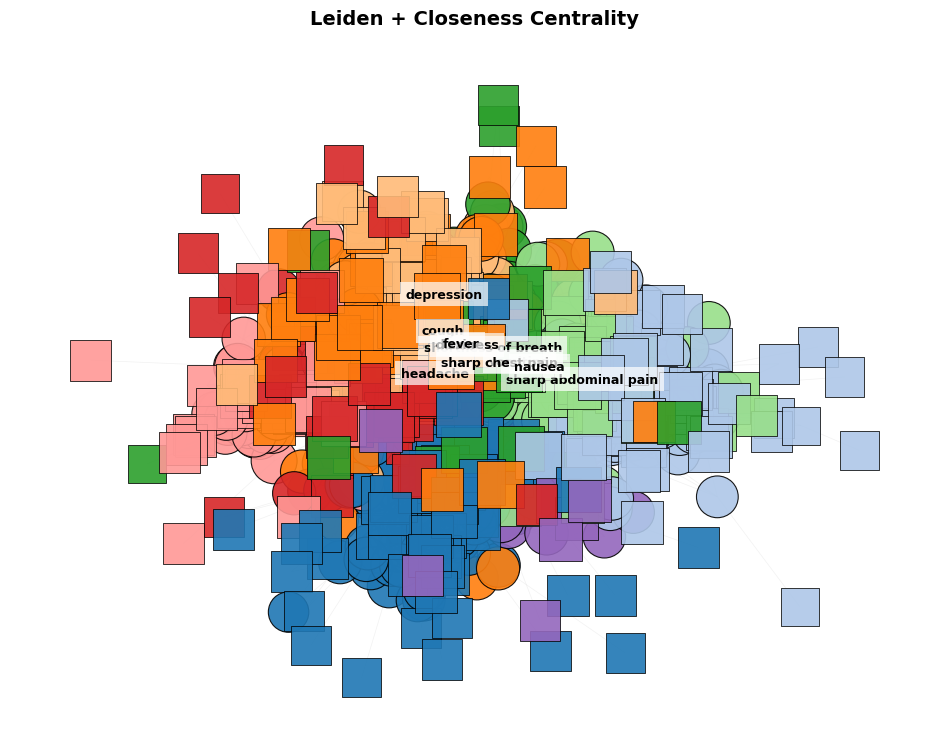

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
import igraph as ig
import leidenalg

# ----------------------------
# Step 1: Community detection
# ----------------------------

# Louvain
louvain_partition = community_louvain.best_partition(B)
modularity = community_louvain.modularity(louvain_partition, B)
print("Louvain Modularity:", modularity)

# Leiden
G_ig = ig.Graph.TupleList(B.edges(), directed=False)
leiden_partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)
print("Leiden detected communities:", len(leiden_partition))

# Map Leiden partition back to NetworkX nodes
leiden_partition_map = {G_ig.vs[i]["name"]: comm for i, comm in enumerate(leiden_partition.membership)}

deg_cent = nx.degree_centrality(B)
bet_cent = nx.betweenness_centrality(B)
clo_cent = nx.closeness_centrality(B)

# def plot_partition_with_centrality(G, partition, centrality, title, disease_nodes, symptom_nodes):
#     plt.figure(figsize=(10,8))
#     pos = nx.spring_layout(G, k=0.15, iterations=30, seed=42)

#     # Color communities differently, also mark disease vs symptom
#     node_colors = []
#     for node in G.nodes():
#         comm_id = partition[node] if isinstance(partition, dict) else partition[node]
#         if node in disease_nodes:
#             # Diseases: stronger colors
#             node_colors.append(plt.cm.Set1(comm_id % 9))
#         else:
#             # Symptoms: softer colors
#             node_colors.append(plt.cm.Pastel1(comm_id % 9))

#     # Node sizes by centrality
#     node_sizes = [centrality[n] * 4000 for n in G.nodes()]

#     nx.draw_networkx(
#         G, pos,
#         node_color=node_colors,
#         node_size=node_sizes,
#         edge_color="lightgray",
#         with_labels=False,
#         alpha=0.8
#     )

#     # Label only top centrality nodes for clarity
#     top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
#     for n, score in top_nodes:
#         x, y = pos[n]
#         plt.text(x, y, n, fontsize=8, fontweight='bold', color="black")

#     plt.title(title, fontsize=14, fontweight="bold")
#     plt.axis("off")
#     plt.show()
def plot_partition_with_centrality(G, partition, centrality, title, disease_nodes, symptom_nodes):
    plt.figure(figsize=(12, 9))
    pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)

    # Map community → color
    communities = list(set(partition.values())) if isinstance(partition, dict) else set(partition.values())
    color_map = plt.cm.tab20

    node_colors = []
    node_shapes = {"disease": "o", "symptom": "s"}  # circle vs square

    # Prepare node groups for drawing separately
    disease_nodes_group = []
    symptom_nodes_group = []
    disease_sizes = []
    symptom_sizes = []
    disease_colors = []
    symptom_colors = []

    for node in G.nodes():
        comm_id = partition[node] if isinstance(partition, dict) else partition[node]
        c = color_map(comm_id % 20)
        size = centrality[node] * 4000

        if node in disease_nodes:
            disease_nodes_group.append(node)
            disease_sizes.append(size)
            disease_colors.append(c)
        else:
            symptom_nodes_group.append(node)
            symptom_sizes.append(size)
            symptom_colors.append(c)

    # Draw edges (light and thin)
    nx.draw_networkx_edges(G, pos, edge_color="lightgray", alpha=0.3, width=0.5)

    # Draw diseases (circles)
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=disease_nodes_group,
        node_size=disease_sizes,
        node_color=disease_colors,
        node_shape="o",
        alpha=0.9,
        linewidths=0.8,
        edgecolors="black"
    )

    # Draw symptoms (squares)
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=symptom_nodes_group,
        node_size=symptom_sizes,
        node_color=symptom_colors,
        node_shape="s",
        alpha=0.9,
        linewidths=0.6,
        edgecolors="black"
    )

    # Label only top nodes (clear + bold)
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for n, score in top_nodes:
        x, y = pos[n]
        plt.text(x, y+0.02, n, fontsize=9, fontweight="bold", color="black",
                 ha="center", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

    plt.title(title, fontsize=14, fontweight="bold", pad=15)
    plt.axis("off")
    plt.show()



# Louvain + Centralities
plot_partition_with_centrality(B, louvain_partition, deg_cent, "Louvain + Degree Centrality", disease_nodes, symptom_nodes)
plot_partition_with_centrality(B, louvain_partition, bet_cent, "Louvain + Betweenness Centrality", disease_nodes, symptom_nodes)
plot_partition_with_centrality(B, louvain_partition, clo_cent, "Louvain + Closeness Centrality", disease_nodes, symptom_nodes)

# Leiden + Centralities
plot_partition_with_centrality(B, leiden_partition_map, deg_cent, "Leiden + Degree Centrality", disease_nodes, symptom_nodes)
plot_partition_with_centrality(B, leiden_partition_map, bet_cent, "Leiden + Betweenness Centrality", disease_nodes, symptom_nodes)
plot_partition_with_centrality(B, leiden_partition_map, clo_cent, "Leiden + Closeness Centrality", disease_nodes, symptom_nodes)


In [47]:
# import networkx as nx
# from community import community_louvain
# import igraph as ig
# import leidenalg
# from pyvis.network import Network

# # ----------------------------
# # Step 1: Community detection
# # ----------------------------

# # Louvain
# louvain_partition = community_louvain.best_partition(B)
# modularity = community_louvain.modularity(louvain_partition, B)
# print("Louvain Modularity:", modularity)

# # Leiden
# G_ig = ig.Graph.TupleList(B.edges(), directed=False)
# leiden_partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)
# print("Leiden detected communities:", len(leiden_partition))

# # Map Leiden partition back to NetworkX nodes
# leiden_partition_map = {G_ig.vs[i]["name"]: comm for i, comm in enumerate(leiden_partition.membership)}

# # Centralities
# deg_cent = nx.degree_centrality(B)
# bet_cent = nx.betweenness_centrality(B)
# clo_cent = nx.closeness_centrality(B)


# # ----------------------------
# # Visualization with PyVis
# # ----------------------------
# def save_partition_html(G, partition, centrality, title_prefix, disease_nodes, symptom_nodes):
#     net = Network(notebook=True, cdn_resources="in_line")
#     net.barnes_hut()

#     for node in G.nodes():
#         comm_id = partition[node] if isinstance(partition, dict) else partition[node]
#         size = centrality[node] * 40  # scale for visibility
#         color = f"hsl({(comm_id * 47) % 360}, 70%, 60%)"  # distinct colors

#         shape = "dot" if node in disease_nodes else "square"

#         net.add_node(
#             node,
#             label=node,
#             size=size,
#             color=color,
#             shape=shape
#         )

#     for u, v in G.edges():
#         net.add_edge(u, v, color="lightgray", opacity=0.5)

#     net.set_options("""
#     var options = {
#       "nodes": { "borderWidth": 1, "shadow": true },
#       "edges": { "color": {"inherit": false}, "smooth": false },
#       "physics": { "barnesHut": { "gravitationalConstant": -3000, "springLength": 120 } }
#     }
#     """)

#     filename = f"{title_prefix.replace(' ', '_').lower()}.html"
#     # net.show(filename)
#     print(f"Saved: {filename}")
#     html_content = net.generate_html()
#     with open(filename, "w", encoding="utf-8") as f:
#         f.write(html_content)

#     print(f"Saved: {filename}")

# # ----------------------------
# # Louvain + Centralities
# # ----------------------------
# save_partition_html(B, louvain_partition, deg_cent, "Louvain Degree Communities", disease_nodes, symptom_nodes)
# save_partition_html(B, louvain_partition, bet_cent, "Louvain Betweenness Communities", disease_nodes, symptom_nodes)
# save_partition_html(B, louvain_partition, clo_cent, "Louvain Closeness Communities", disease_nodes, symptom_nodes)

# # ----------------------------
# # Leiden + Centralities
# # ----------------------------
# save_partition_html(B, leiden_partition_map, deg_cent, "Leiden Degree Communities", disease_nodes, symptom_nodes)
# save_partition_html(B, leiden_partition_map, bet_cent, "Leiden Betweenness Communities", disease_nodes, symptom_nodes)
# save_partition_html(B, leiden_partition_map, clo_cent, "Leiden Closeness Communities", disease_nodes, symptom_nodes)

In [46]:
import networkx as nx
from community import community_louvain
import igraph as ig
import leidenalg
from pyvis.network import Network
import json # Import the json library

# ----------------------------
# Step 1: Community detection
# ----------------------------

# Louvain
louvain_partition = community_louvain.best_partition(B)
modularity = community_louvain.modularity(louvain_partition, B)
print("Louvain Modularity:", modularity)

# Leiden
G_ig = ig.Graph.TupleList(B.edges(), directed=False)
leiden_partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)
print("Leiden detected communities:", len(leiden_partition))

# Map Leiden partition back to NetworkX nodes
leiden_partition_map = {G_ig.vs[i]["name"]: comm for i, comm in enumerate(leiden_partition.membership)}

# Centralities
deg_cent = nx.degree_centrality(B)
bet_cent = nx.betweenness_centrality(B)
clo_cent = nx.closeness_centrality(B)


# ----------------------------
# Visualization with PyVis
# ----------------------------
def save_partition_html(G, partition, centrality, title_prefix, disease_nodes, symptom_nodes):
    net = Network(height="750px", width="100%", bgcolor="white", font_color="black", notebook=True, cdn_resources="in_line")
    net.barnes_hut()

    for node in G.nodes():
        comm_id = partition[node] if isinstance(partition, dict) else partition[node]

        # Larger scaling for central nodes
        size = max(8, centrality[node] * 5000)

        # Professional distinct colors
        color = f"hsl({(comm_id * 47) % 360}, 65%, 55%)"

        shape = "dot" if node in disease_nodes else "square"

        net.add_node(
            node,
            label=node,  # still stored, but won’t clutter
            size=size,
            color=color,
            shape=shape,
            title=f"{node}<br>Centrality: {centrality[node]:.4f}"  # shows on hover
        )

    for u, v in G.edges():
        net.add_edge(u, v, color="lightgray", opacity=0.3)

    # Hide labels until hover/click
    # Construct options as a Python dictionary
    options = {
      "nodes": {
        "borderWidth": 1,
        "shadow": True,
        "font": {"size": 0}  # hide by default
      },
      "edges": {
        "color": {"inherit": False},
        "smooth": False
      },
      "interaction": {
        "hover": True,
        "tooltipDelay": 200,
        "selectConnectedEdges": True
      },
      "physics": {
        "barnesHut": {
          "gravitationalConstant": -2000,
          "springLength": 150,
          "springConstant": 0.02
        },
        "minVelocity": 0.75
      }
    }
    # Convert dictionary to JSON string and set options
    net.set_options(json.dumps(options))
    filename = f"{title_prefix.replace(' ', '_').lower()}.html"
    html_content = net.generate_html()
    with open(filename, "w", encoding="utf-8") as f:
        f.write(html_content)

    print(f"Saved: {filename}")


# ----------------------------
# Louvain + Centralities
# ----------------------------
save_partition_html(B, louvain_partition, deg_cent, "Louvain Degree Communities", disease_nodes, symptom_nodes)
save_partition_html(B, louvain_partition, bet_cent, "Louvain Betweenness Communities", disease_nodes, symptom_nodes)
save_partition_html(B, louvain_partition, clo_cent, "Louvain Closeness Communities", disease_nodes, symptom_nodes)

# ----------------------------
# Leiden + Centralities
# ----------------------------
save_partition_html(B, leiden_partition_map, deg_cent, "Leiden Degree Communities", disease_nodes, symptom_nodes)
save_partition_html(B, leiden_partition_map, bet_cent, "Leiden Betweenness Communities", disease_nodes, symptom_nodes)
save_partition_html(B, leiden_partition_map, clo_cent, "Leiden Closeness Communities", disease_nodes, symptom_nodes)

Louvain Modularity: 0.5852831762298356
Leiden detected communities: 9
Saved: louvain_degree_communities.html
Saved: louvain_betweenness_communities.html
Saved: louvain_closeness_communities.html
Saved: leiden_degree_communities.html
Saved: leiden_betweenness_communities.html
Saved: leiden_closeness_communities.html


In [ ]:
!pip install pyvis -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00


In [48]:
from pyvis.network import Network
from IPython.display import IFrame

# Create PyVis network
net = Network(
    notebook=True,
    height="750px",
    width="100%",
    bgcolor="#222222",
    font_color="white",
    cdn_resources="remote"  # avoid local loading issues
)

# Add nodes with Leiden community colors
for node in B.nodes():
    comm_id = community_dict.get(node, -1)
    net.add_node(
        node,
        label=node,
        title=f"Community {comm_id}",
        color=f"hsl({comm_id * 50 % 360}, 80%, 50%)"
    )

# Add edges
for u, v in B.edges():
    net.add_edge(u, v)

# Add layout/physics controls
net.show_buttons(filter_=['physics'])

# Save and display inside Jupyter
net.show("disease_symptom_network.html")

# Inline display (instead of localhost)
IFrame("disease_symptom_network.html", width="100%", height="800")

disease_symptom_network.html


# Insights

- Degree centrality:

Diseases with highest degree are multi-symptomatic → potential complex or systemic illnesses.

Symptoms with highest degree are “common symptoms” (e.g., fever, cough, fatigue).

- Betweenness centrality:

Diseases bridging clusters → may share symptoms with multiple categories (useful for misdiagnosis risks).

Symptoms with high betweenness are “key diagnostic markers” (connect unrelated diseases).

- Closeness centrality:

Diseases close to others → likely belong to common categories (respiratory, infectious).

Symptoms with high closeness spread influence quickly (e.g., headache).

- Louvain & Leiden Communities:

Louvain provides modularity-driven clustering.

Leiden gives better-connected, fine-grained communities (less fragmented).

Communities reveal groups of diseases sharing symptom sets → helps cluster diseases into categories (respiratory, neurological, infectious).

In [ ]:
!pip install pyvis

In [ ]:
# !pip install pyvis
from pyvis.network import Network
import pandas as pd
import networkx as nx

net = Network(height="800px", width="100%", notebook=True, bgcolor="#ffffff", font_color="black")
net.from_nx(B)


disease_nodes = set(df["diseases"].values)
for node in net.nodes:
    if node["id"] in disease_nodes:
        node["color"] = "red"
        node["size"] = 25
        node["title"] = f"Disease: {node['id']}"
    else:
        node["color"] = "skyblue"
        node["size"] = 15
        node["title"] = f"Symptom: {node['id']}"

net.show("disease_symptom_network.html")

disease_symptom_network.html
✅ Saved: disease_symptom_network.html
